<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Julia" data-toc-modified-id="Julia-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Julia</a></span></li><li><span><a href="#Few-Julia-Sets" data-toc-modified-id="Few-Julia-Sets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Few Julia Sets</a></span></li><li><span><a href="#Smoothed-version-of-the-mandelbrot" data-toc-modified-id="Smoothed-version-of-the-mandelbrot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Smoothed version of the mandelbrot</a></span></li><li><span><a href="#Basic-Julia-3d-surface" data-toc-modified-id="Basic-Julia-3d-surface-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Basic Julia 3d surface</a></span></li><li><span><a href="#Julia-3d-surface-close-ups" data-toc-modified-id="Julia-3d-surface-close-ups-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Julia 3d surface close ups</a></span></li><li><span><a href="#More-Julia-sets" data-toc-modified-id="More-Julia-sets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>More Julia sets</a></span></li></ul></div>

# Julia 

The code is taken from the book **'Make your own Mandelbrot'** by **Tariq Rashid**

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.ndimage

Displaying the 3D figure via images - since the interactive 3D surface makes notebook very big

In [4]:
# from mayavi import mlab
# mlab.init_notebook(backend='x3d')

In [5]:
def julia(z, c, maxiter):
    # start iterating and stop when it reaches maxiter times
    for iteration in range(maxiter):
        
        # the main function which generates the output value of z from the input values using the formula (z^2) + c 
        z = (z * z) + c
        
        # check if the (pythagorean) magnitude of the output complex number is greater than 4, if so stop iterating
        # as we've diverged already
        if abs(z) > 4:
            break
            
    # number of iterations (not the value of z), as this tells us how quickly the values diverged past the 
    # magnitude threshold of 4
    return iteration

In [6]:
def draw_julia_at(xvalues, yvalues, const, c):
    # size of these lists of x and y values
    xlen = len(xvalues)
    ylen = len(yvalues)
    
    # # create an array of the right size to represent the atlas, we use the number of items in xvalues and yvalues
    atlas = np.empty([xlen, ylen])

    # go through each point in this atlas array and test to see how many
    # iterations are needed to diverge (or reach the maximum iterations
    # when not diverging)
    for ix in range(xlen):
        for iy in range(ylen):
            
            # at this point in the array, work out what the actual real
            # and imaginary parts of x are by looking it up in the xvalue and
            # yvalue lists
            zx = xvalues[ix]
            zy = yvalues[iy]
            z = complex(zx, zy)
        
            # # now we know what c is for this place in the atlas, apply
            # the mandel() function to return the number of iterations it took to
            # diverge

            atlas[ix, iy] = julia(z, c, const)

    return atlas

# Few Julia Sets

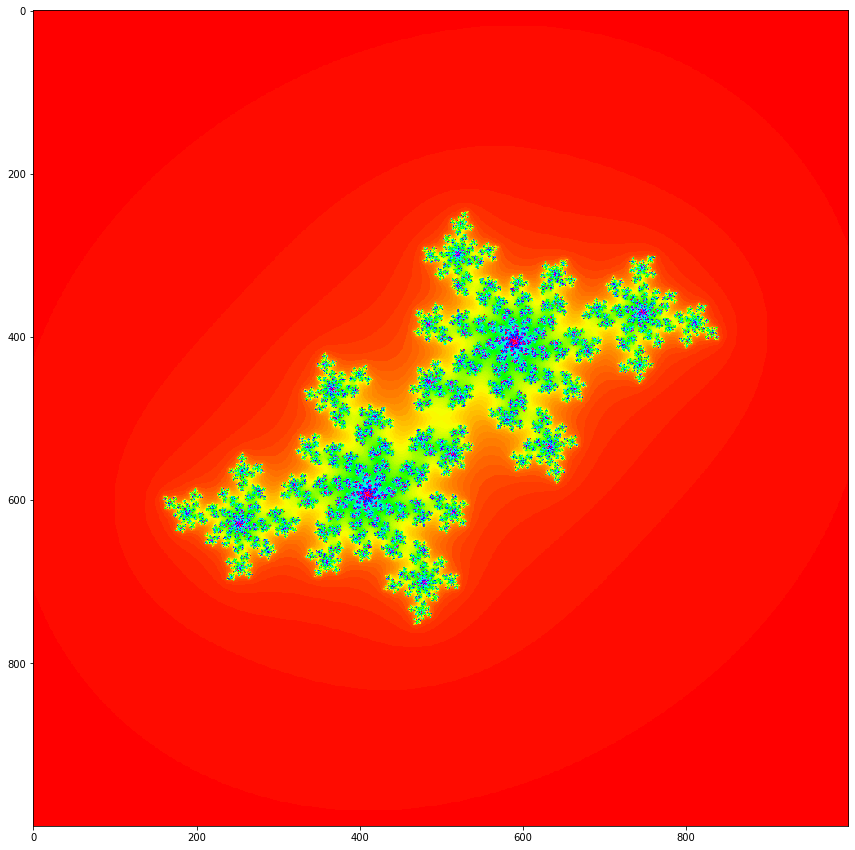

In [8]:
# set the location and size of the atlas rectangle
xvalues = np.linspace(-2, 2 , 1000)
yvalues = np.linspace(-2, 2 , 1000)

# value of c (unique for each Julia set)
c = complex(-0.35, 0.65)

atlas = draw_julia_at(xvalues, yvalues, 120, c)

# plot the array atlas as an image, with its values represented as
# colours, peculiarity of python that we have to transpose the array
plt.figure(figsize=(15, 15))
plt.imshow(atlas.T, cmap='hsv')

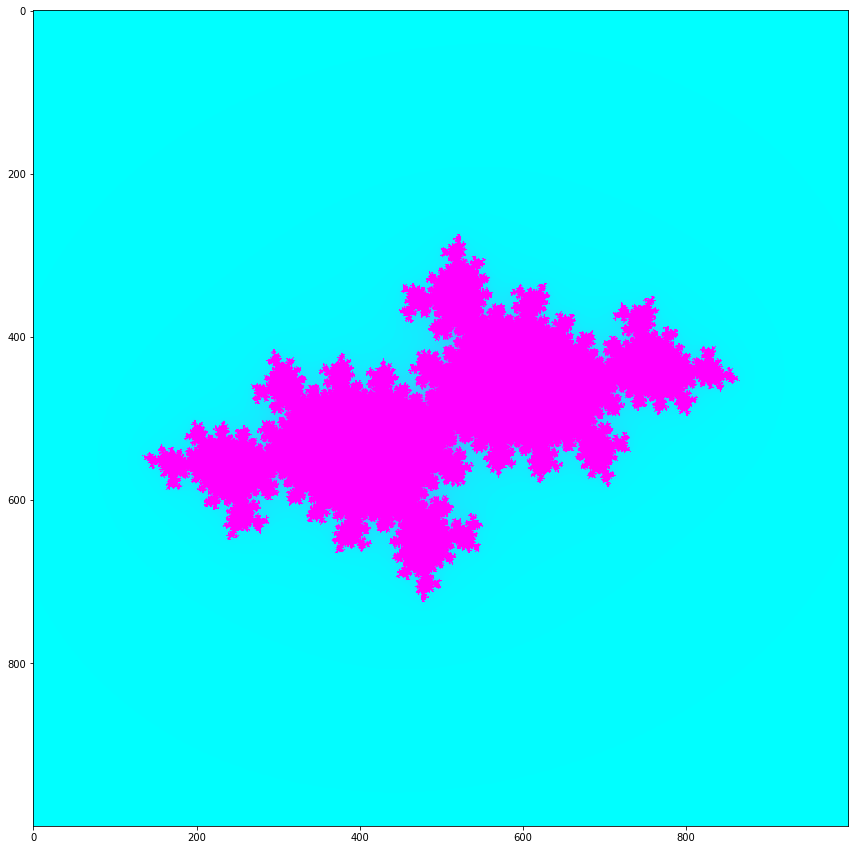

In [9]:
# set the location and size of the atlas rectangle
xvalues = np.linspace(-2, 2 , 1000)
yvalues = np.linspace(-2, 2 , 1000)

# value of c (unique for each Julia set)
c = complex(-0.65, 0.35)

atlas = draw_julia_at(xvalues, yvalues, 120, c)

# plot the array atlas as an image, with its values represented as
# colours, peculiarity of python that we have to transpose the array
plt.figure(figsize=(15, 15))
plt.imshow(atlas.T, cmap='cool')

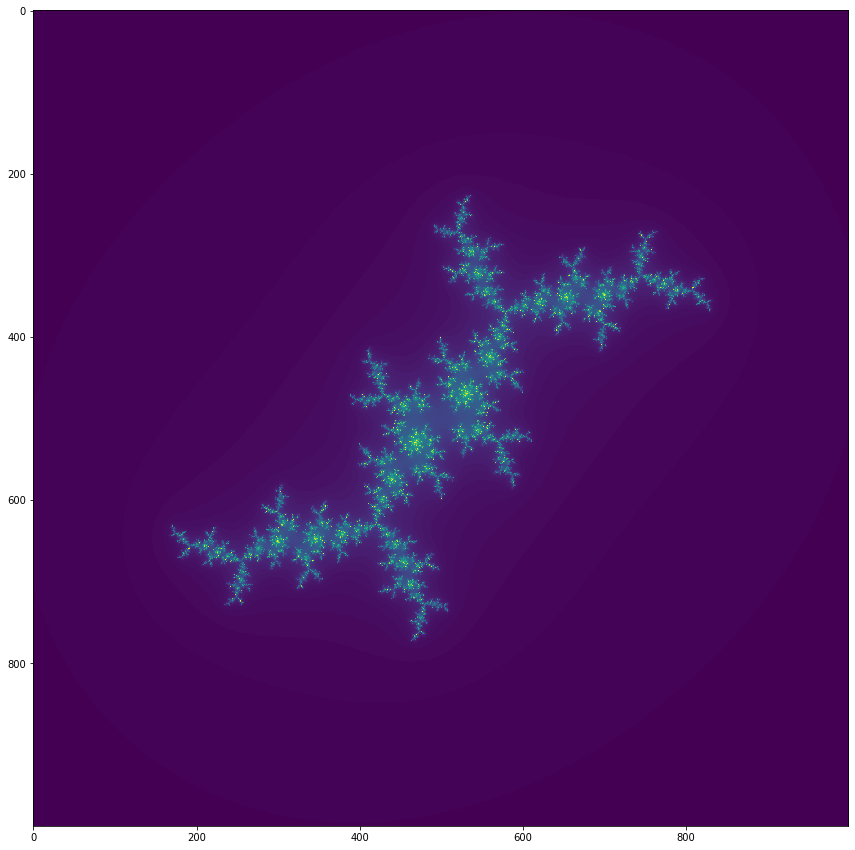

In [10]:
# set the location and size of the atlas rectangle
xvalues = np.linspace(-2, 2 , 1000)
yvalues = np.linspace(-2, 2 , 1000)

# value of c (unique for each Julia set)
c = complex(-0.15, 0.85)

atlas = draw_julia_at(xvalues, yvalues, 120, c)

# plot the array atlas as an image, with its values represented as
# colours, peculiarity of python that we have to transpose the array
plt.figure(figsize=(15, 15))
plt.imshow(atlas.T)

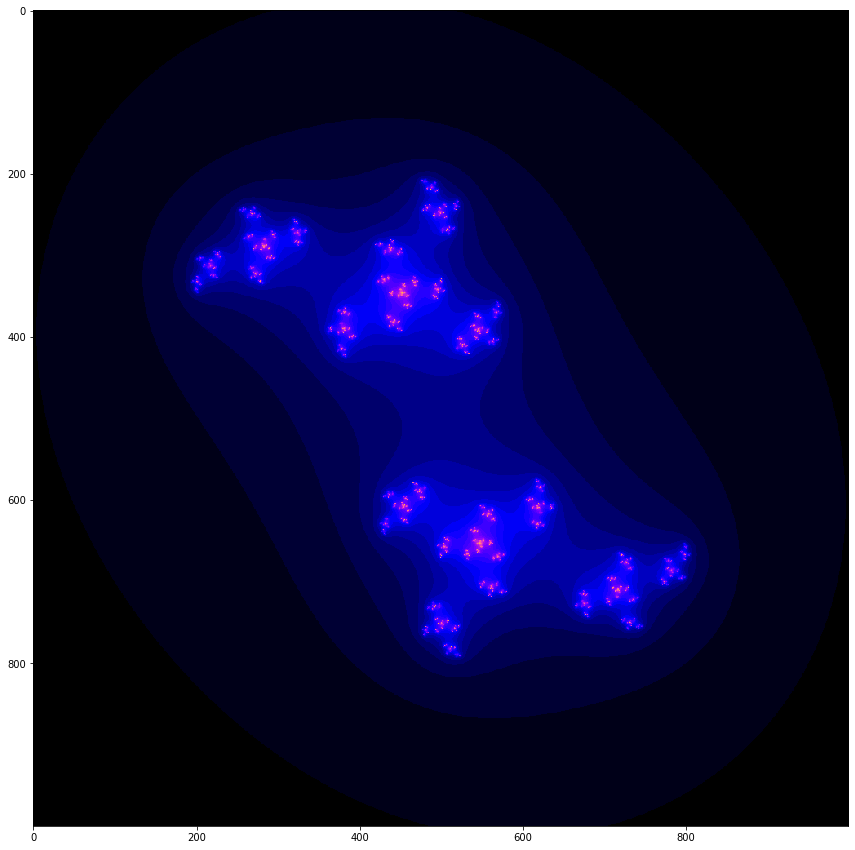

In [11]:
# set the location and size of the atlas rectangle
xvalues = np.linspace(-2, 2 , 1000)
yvalues = np.linspace(-2, 2 , 1000)

# value of c (unique for each Julia set)
c = complex(0.15, -0.85)

atlas = draw_julia_at(xvalues, yvalues, 120, c)

# plot the array atlas as an image, with its values represented as
# colours, peculiarity of python that we have to transpose the array
plt.figure(figsize=(15, 15))
plt.imshow(atlas.T, cmap='gnuplot2')

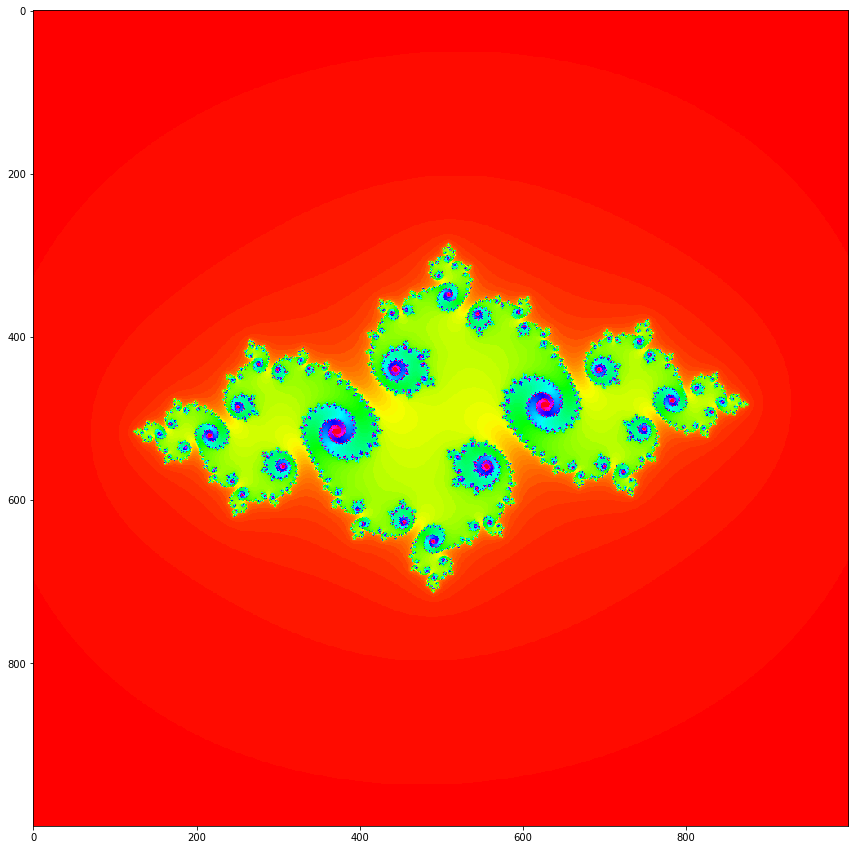

In [12]:
# We will use this one for the 3d surface plot

# set the location and size of the atlas rectangle
xvalues = np.linspace(-2, 2 , 1000)
yvalues = np.linspace(-2, 2 , 1000)

# value of c (unique for each Julia set)
c = complex(-0.768662, 0.130477)

atlas = draw_julia_at(xvalues, yvalues, 120, c)

# plot the array atlas as an image, with its values represented as
# colours, peculiarity of python that we have to transpose the array
plt.figure(figsize=(15, 15))
plt.imshow(atlas.T, cmap='hsv')

# Smoothed version of julia

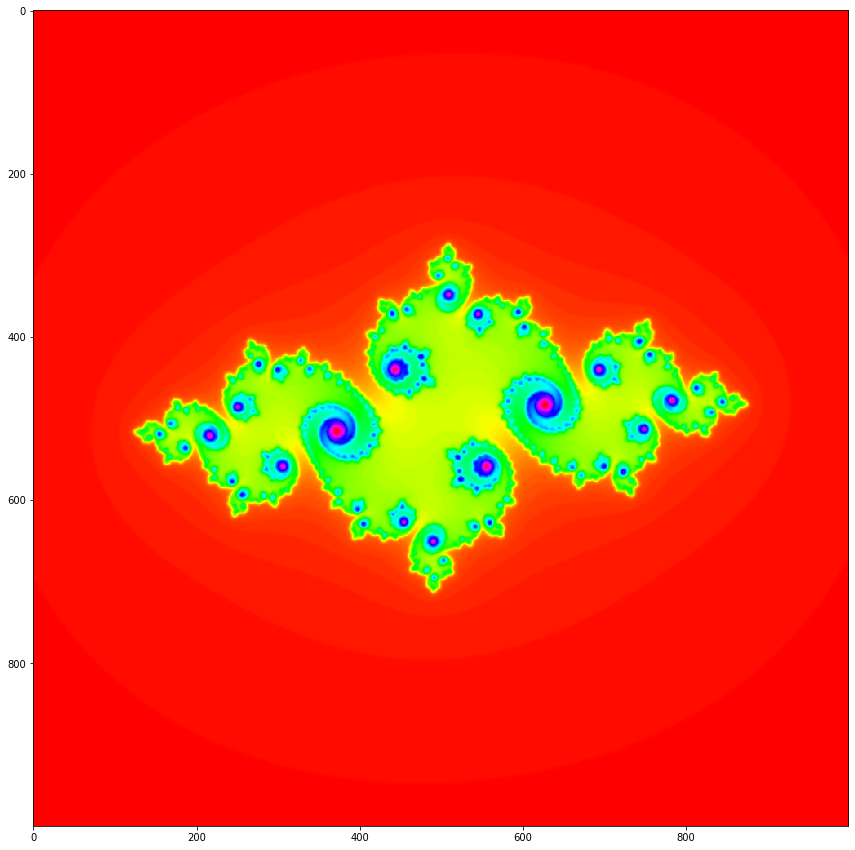

In [13]:
# set the figure size
plt.figure(figsize=(15, 15))

# create a smoothed image of the original by applying a Gaussian blur filter
smoothed_atlas = scipy.ndimage.gaussian_filter(atlas.T, 2)

# plot the array atlas as an image, with its values represented 
# as colours, peculiarity of python that we have to transpose the array
plt.imshow(smoothed_atlas, cmap='hsv')

**Not running the code below because it makes the file too big to push into git.** 
**Adding the pics to show the 3d images of the mandelbrot surface**

In [7]:
# set the figure size
# fig = mlab.figure(size=(480, 340))
# m = mlab.surf(smoothed_atlas.T, colormap='hsv', warp_scale=0.9, figure=fig)
# m

# Basic Julia 3d surface

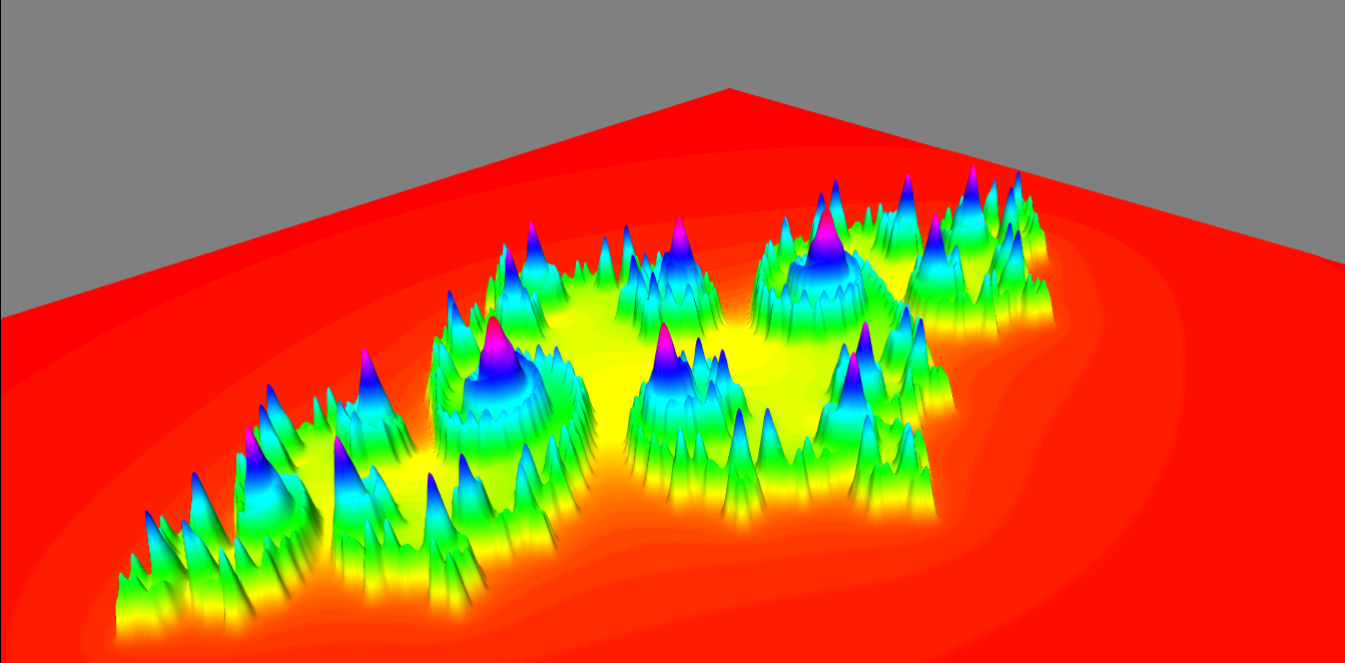

In [14]:
from IPython.display import Image
Image(filename='../mandel_imgs/julia_3_3d_1.PNG') 

# Julia 3d surface close ups

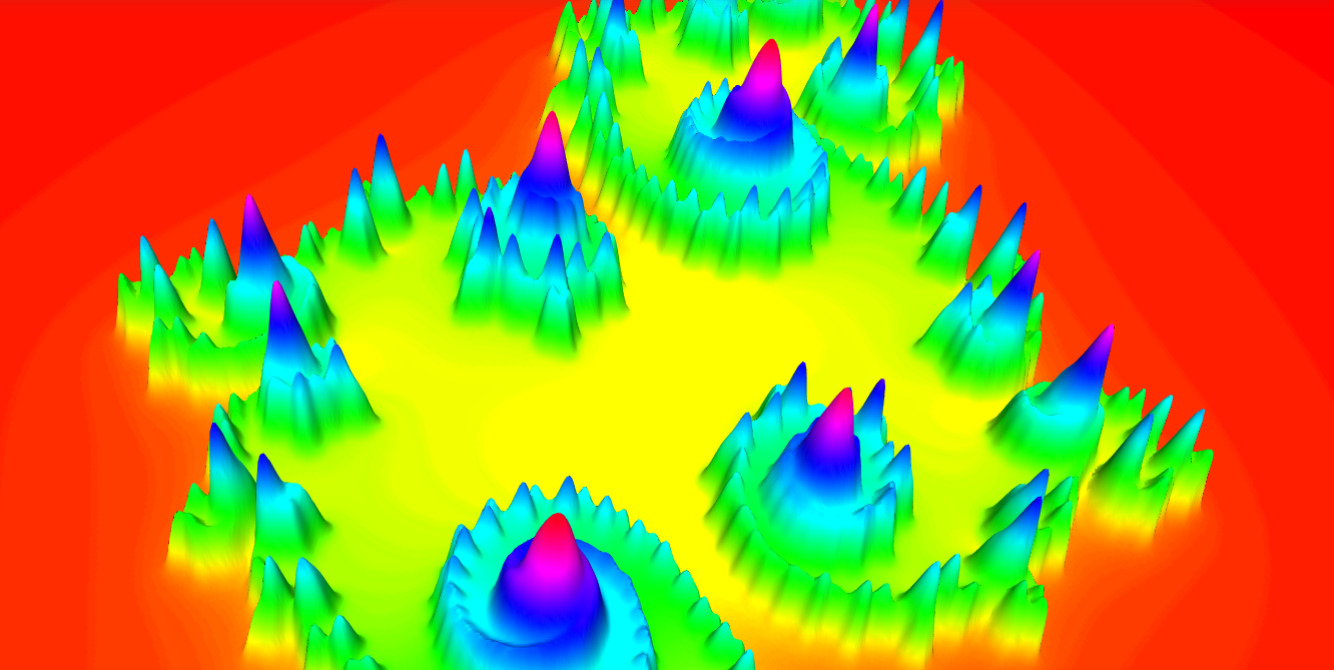

In [15]:
Image(filename='../mandel_imgs/julia_3_3d_2.PNG') 

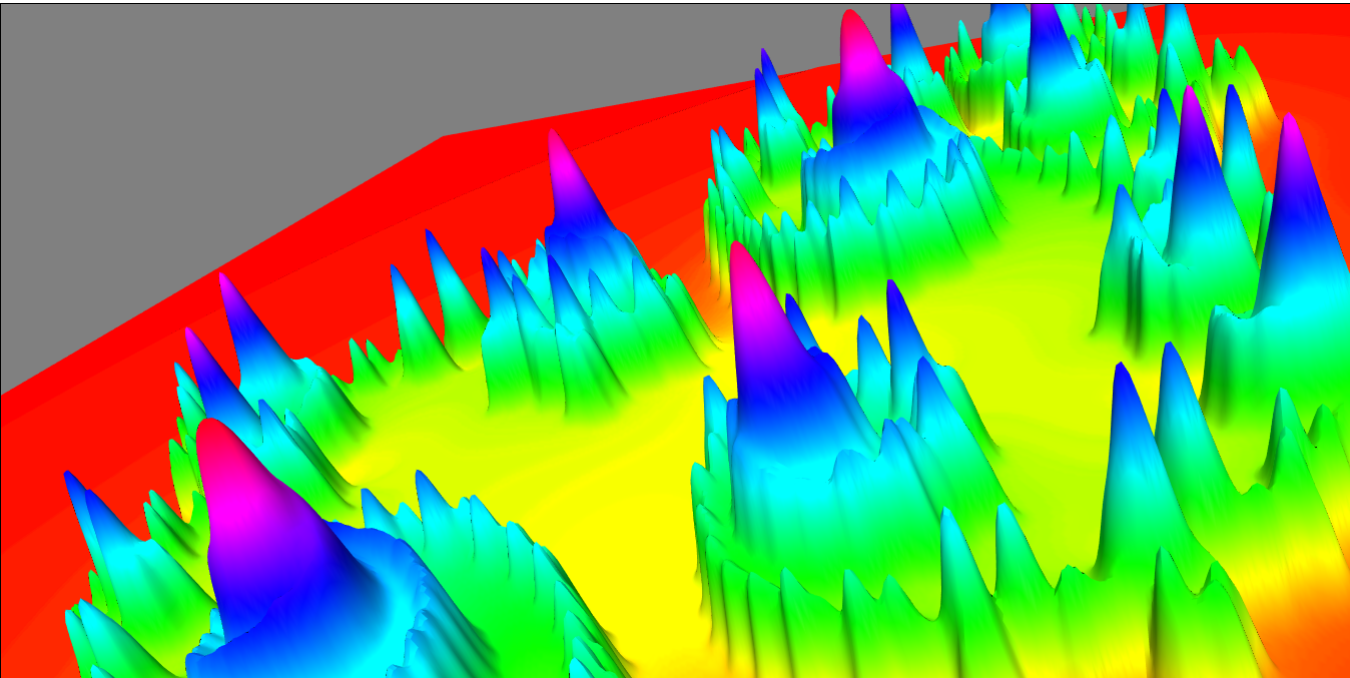

In [16]:
Image(filename='../mandel_imgs/julia_3_3d_3.PNG') 

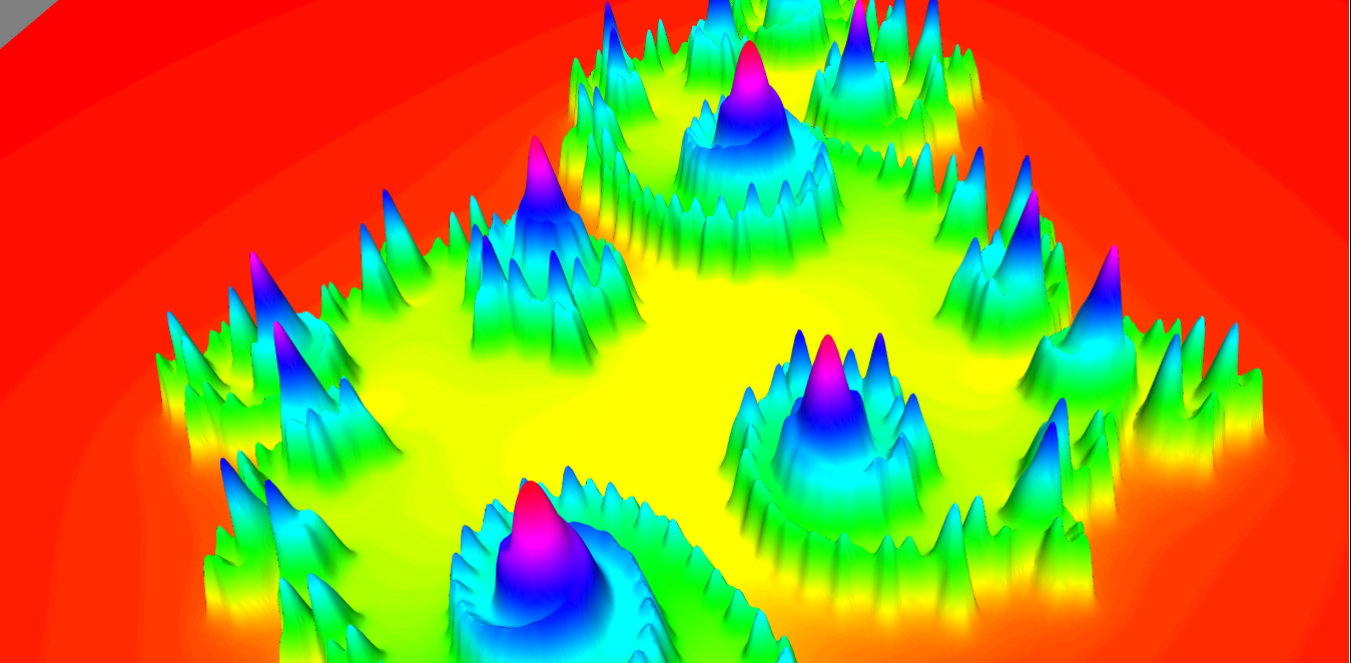

In [17]:
Image(filename='../mandel_imgs/julia_3_3d_4.PNG') 

# More Julia sets

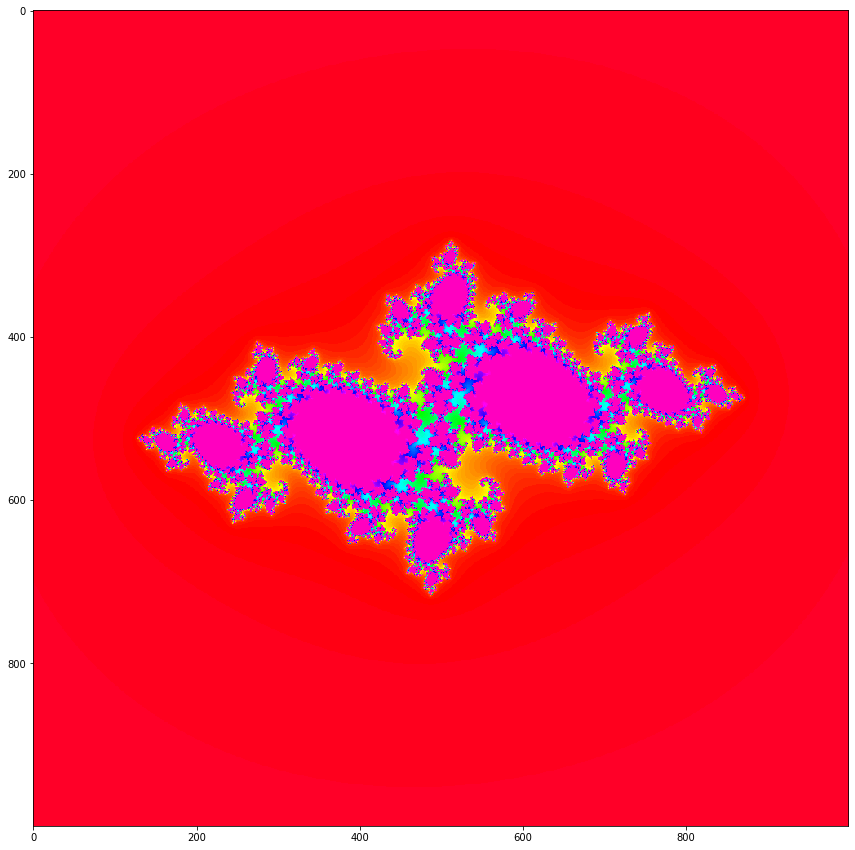

In [24]:
# We will use this one for the 3d surface plot

# set the location and size of the atlas rectangle
xvalues = np.linspace(-2, 2 , 1000)
yvalues = np.linspace(-2, 2 , 1000)

# value of c (unique for each Julia set)
c = complex(-0.7269, 0.1889)

atlas = draw_julia_at(xvalues, yvalues, 120, c)

# plot the array atlas as an image, with its values represented as
# colours, peculiarity of python that we have to transpose the array
plt.figure(figsize=(15, 15))
plt.imshow(atlas.T, cmap='gist_rainbow')

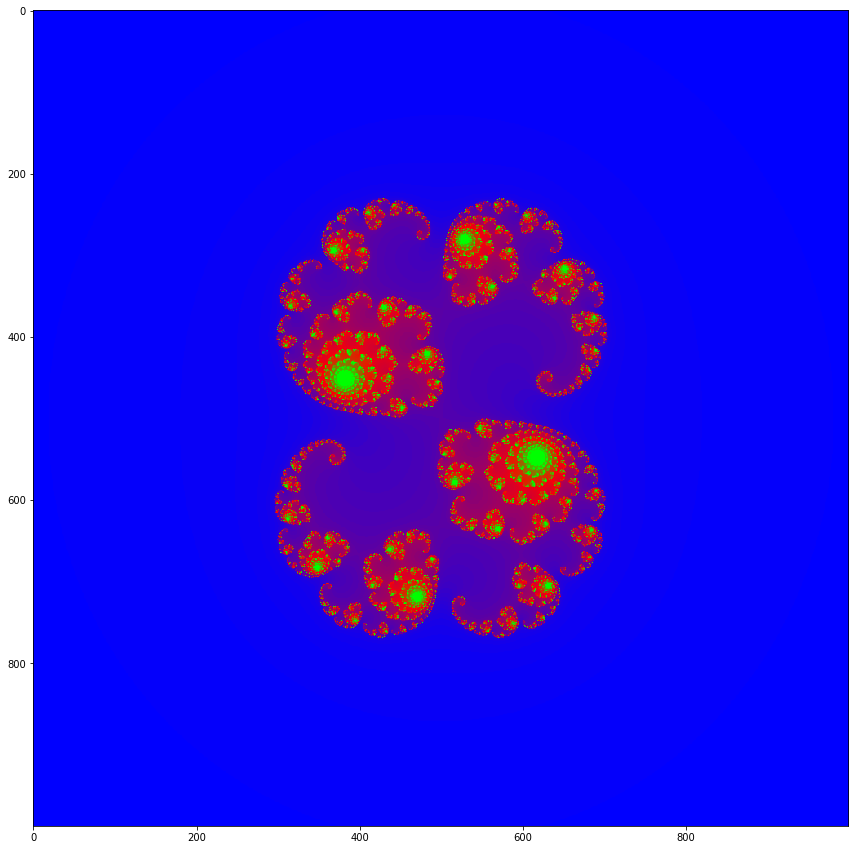

In [34]:
# We will use this one for the 3d surface plot

# set the location and size of the atlas rectangle
xvalues = np.linspace(-2, 2 , 1000)
yvalues = np.linspace(-2, 2 , 1000)

# value of c (unique for each Julia set)
c = complex(0.285, 0.01)

atlas = draw_julia_at(xvalues, yvalues, 120, c)

# plot the array atlas as an image, with its values represented as
# colours, peculiarity of python that we have to transpose the array
plt.figure(figsize=(15, 15))
plt.imshow(atlas.T, cmap='brg')

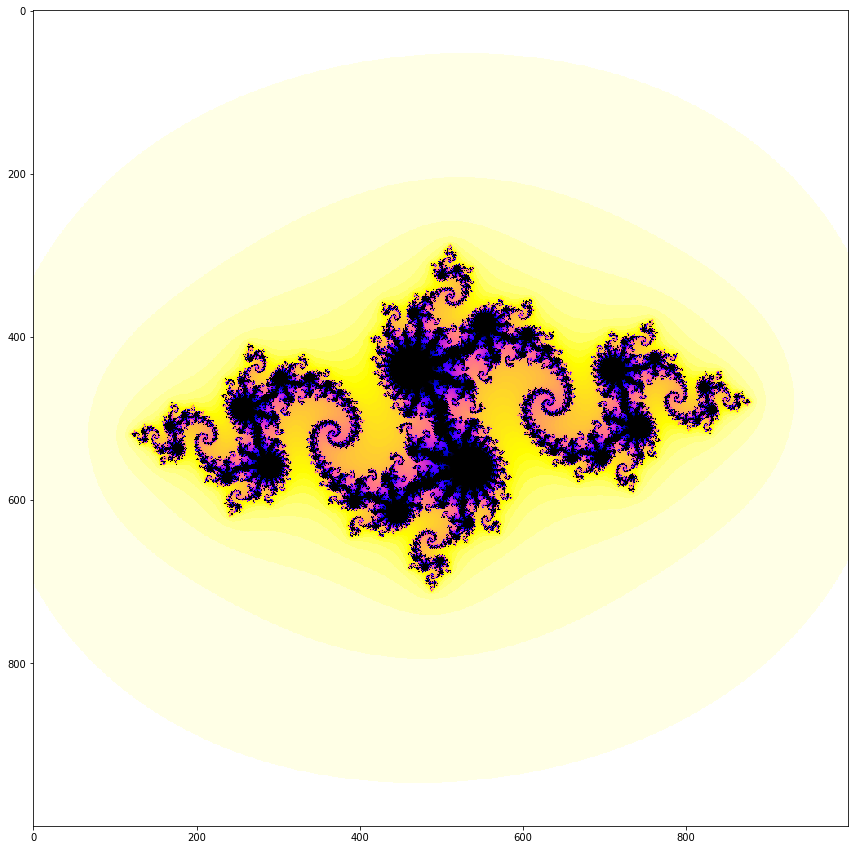

In [29]:
# We will use this one for the 3d surface plot

# set the location and size of the atlas rectangle
xvalues = np.linspace(-2, 2 , 1000)
yvalues = np.linspace(-2, 2 , 1000)

# value of c (unique for each Julia set)
c = complex(-0.8, 0.156)

atlas = draw_julia_at(xvalues, yvalues, 120, c)

# plot the array atlas as an image, with its values represented as
# colours, peculiarity of python that we have to transpose the array
plt.figure(figsize=(15, 15))
plt.imshow(atlas.T, cmap='gnuplot2_r')

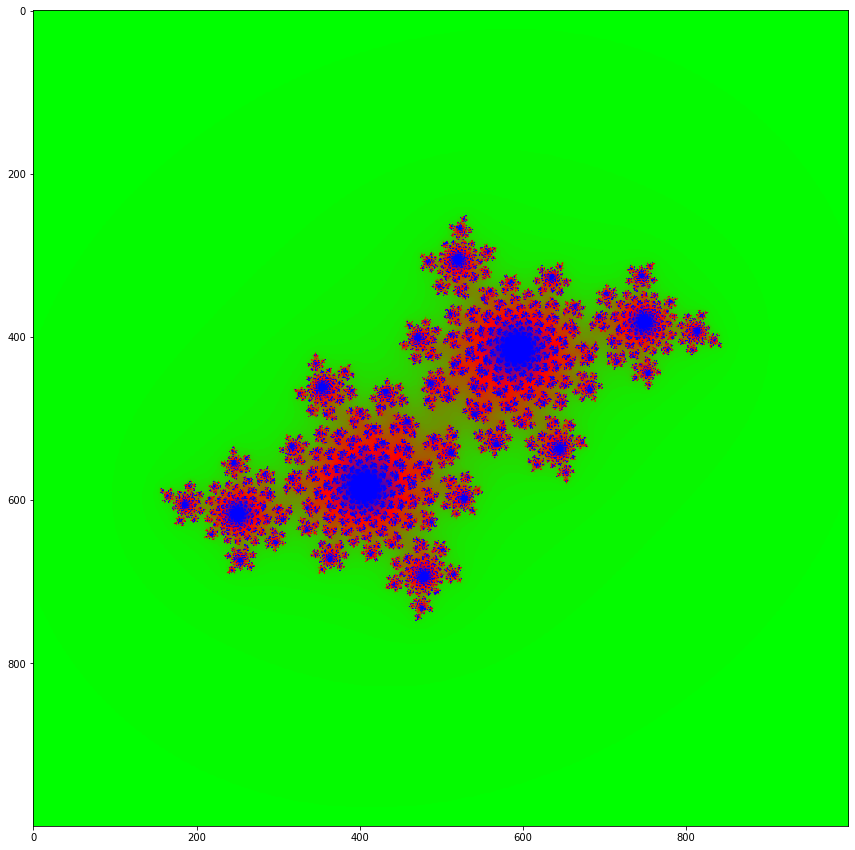

In [31]:
# We will use this one for the 3d surface plot

# set the location and size of the atlas rectangle
xvalues = np.linspace(-2, 2 , 1000)
yvalues = np.linspace(-2, 2 , 1000)

# value of c (unique for each Julia set)
c = complex(-0.4, 0.6)

atlas = draw_julia_at(xvalues, yvalues, 120, c)

# plot the array atlas as an image, with its values represented as
# colours, peculiarity of python that we have to transpose the array
plt.figure(figsize=(15, 15))
plt.imshow(atlas.T, cmap='brg_r')